In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

class VisualizationCreator:
    def __init__(self):
        pass

    def create_table_visualization(self, folder_name, table_name):
        file_path = f"../data/{folder_name}/{table_name}.csv"  # Adjusted file path
        df = pd.read_csv(file_path)
        print(df)  

    def create_line_chart_visualization(self, folder_name, table_name, x_axis, y_axis):
        file_path = f"../data/{folder_name}/{table_name}.csv"  # Adjusted file path
        df = pd.read_csv(file_path)

        # Convert 'Date' column to datetime type
        df['Date'] = pd.to_datetime(df['Date'])

        # Plot the line chart
        plt.figure(figsize=(10, 6))
        plt.plot(df[x_axis], df[y_axis])
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.title("Line Chart Visualization")
        plt.xticks(rotation=45, ha='right')  
        plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as 'YYYY-MM-DD'
        plt.grid(True)  # Add grid lines
        plt.tight_layout()
        plt.show()

    def create_histogram_visualization(self, folder_name, table_name, column):
        file_path = f"../data/{folder_name}/{table_name}.csv"  # Adjusted file path
        df = pd.read_csv(file_path)
        plt.figure(figsize=(10, 6))
        plt.hist(df[column], bins=20)
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.title("Histogram Visualization")
        plt.show()

    def create_content_type_vs_views_bar_plot(self, folder_name, table_name):
        file_path = f"../data/{folder_name}/{table_name}.csv"  # Adjusted file path
        df = pd.read_csv(file_path)
        
        # Group by 'Content type' and calculate the sum of 'Views'
        views_by_content_type = df.groupby('Content type')['Views'].sum().reset_index()
        

        print("Views by Content Type:")
        print(views_by_content_type)
        # Data for plotting
        content_types = views_by_content_type['Content type']
        views = views_by_content_type['Views']
        
        # Create bar plot
        plt.figure(figsize=(10, 6))
        plt.bar(content_types, views, color=['blue', 'green', 'red'])
        plt.xlabel('Content Type')
        plt.ylabel('Views')
        plt.title('Views by Content Type')
        plt.show()

    def create_watch_time_pie_chart(self, folder_name, table_name):
        file_path = f"../data/{folder_name}/{table_name}.csv"  # Adjusted file path
        df = pd.read_csv(file_path, header=0, skiprows=[2])
        print(df.columns)

        # Convert 'Date' column to datetime type, coercing errors
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

        # Drop rows with NaT values (if any)
        df = df.dropna(subset=['Date'])

        # Extract year from 'Date' column
        df['Year'] = df['Date'].dt.year

        # Group by year and calculate the sum of watch time
        watch_time_per_year = df.groupby('Year')['Watch time (hours)'].sum().reset_index()

        # Plot pie chart with neon colors
        neon_colors = ['#ff6ec7', '#72e0ff', '#eeff72', '#ffab72', '#b872ff']
        plt.figure(figsize=(8, 8))
        plt.pie(watch_time_per_year['Watch time (hours)'], labels=watch_time_per_year['Year'], autopct='%1.1f%%', startangle=140, colors=neon_colors)
        plt.title('Watch time Distribution per Year')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
   
viz_creator = VisualizationCreator()


In [35]:
viz_creator.create_table_visualization("Cities", "Chart data")

            Date                                 Cities    City name  Views
0     2020-06-28  0x164b85cef5ab402d:0x8467b6b037a24d49  Addis Ababa      0
1     2020-06-29  0x164b85cef5ab402d:0x8467b6b037a24d49  Addis Ababa      0
2     2020-06-30  0x164b85cef5ab402d:0x8467b6b037a24d49  Addis Ababa      0
3     2020-07-01  0x164b85cef5ab402d:0x8467b6b037a24d49  Addis Ababa      0
4     2020-07-02  0x164b85cef5ab402d:0x8467b6b037a24d49  Addis Ababa      0
...          ...                                    ...          ...    ...
6390  2023-12-24  0x487a4d4c5226f5db:0xd9be143804fe6baa   Manchester      0
6391  2023-12-25  0x487a4d4c5226f5db:0xd9be143804fe6baa   Manchester      0
6392  2023-12-26  0x487a4d4c5226f5db:0xd9be143804fe6baa   Manchester      0
6393  2023-12-27  0x487a4d4c5226f5db:0xd9be143804fe6baa   Manchester      0
6394  2023-12-28  0x487a4d4c5226f5db:0xd9be143804fe6baa   Manchester      0

[6395 rows x 4 columns]


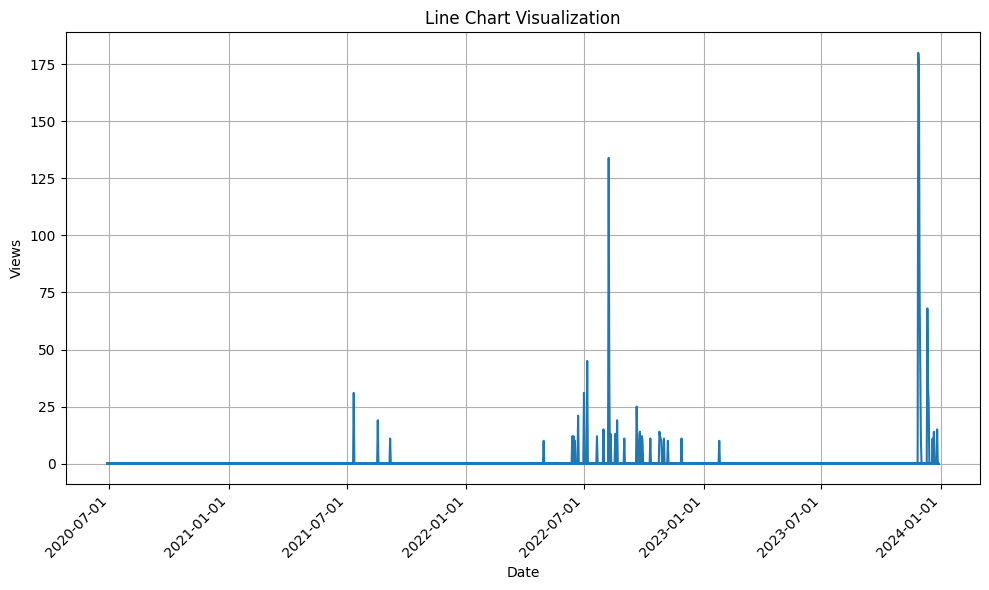

In [46]:
viz_creator.create_line_chart_visualization("Cities", "Chart data", "Date", "Views")

Views by Content Type:
  Content type  Views
0        Other     11
1        Total  26625
2       Videos  26614


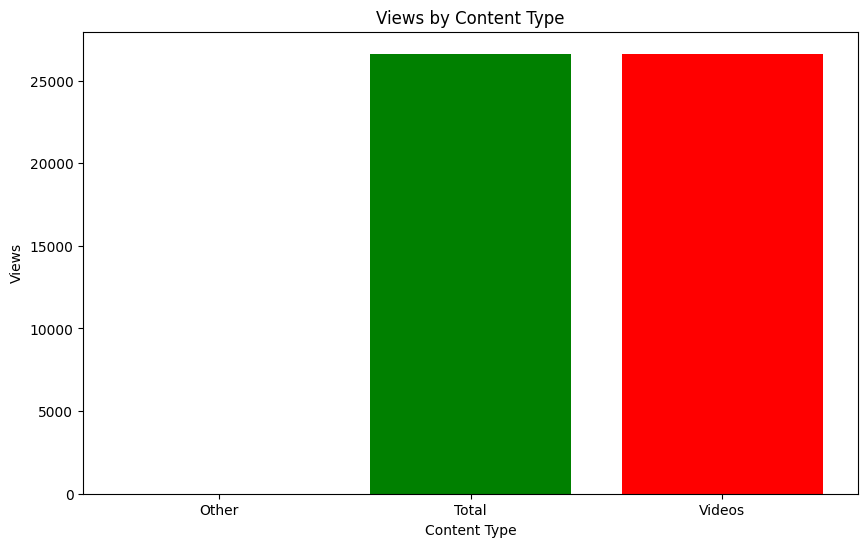

In [47]:
viz_creator.create_content_type_vs_views_bar_plot("Content type", "Table data")

Index(['Date', 'Views', 'Watch time (hours)', 'Average view duration'], dtype='object')


C:\Users\dell\AppData\Local\Temp\ipykernel_6372\387110219.py:72: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


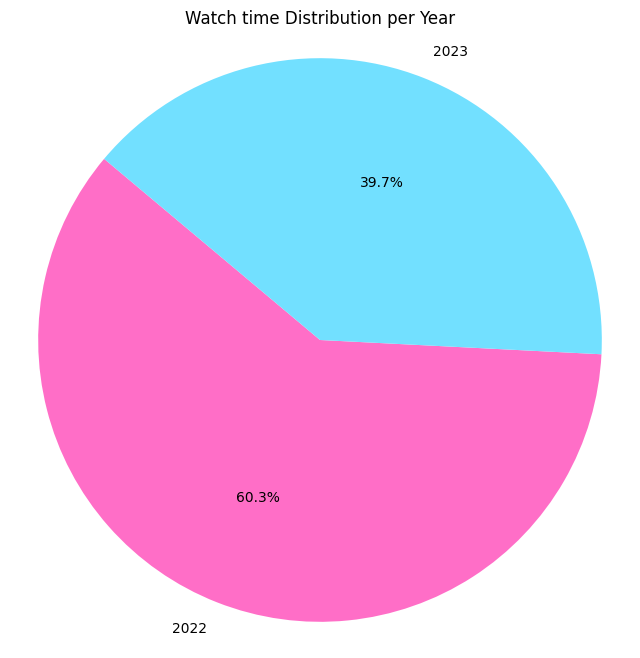

In [67]:
viz_creator.create_watch_time_pie_chart("Viewership by Date", "Table data")